# Titanic Survival Prediction Using Machine Learning


In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [47]:
#reading csv file
data=pd.read_csv('titanic_train.csv')

In [48]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
#checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

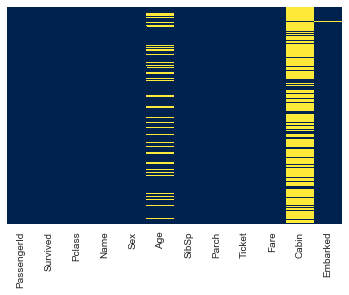

In [50]:
#plotting nullvalues using seaborn
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

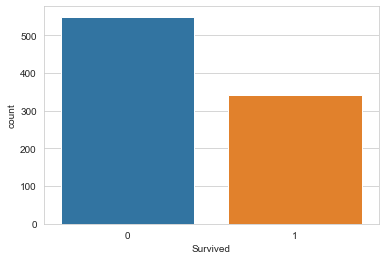

In [51]:
#plotting survived and notsurvived
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=data)

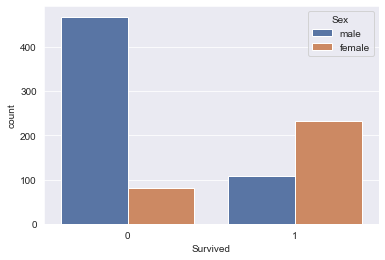

In [52]:
sb.set_style('darkgrid')
sb.countplot(x='Survived',hue='Sex',data=data,palette='deep')

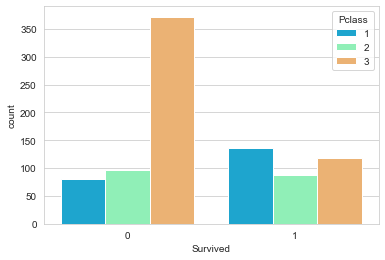

In [53]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

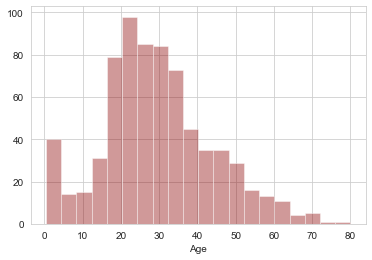

In [54]:
sb.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=20)

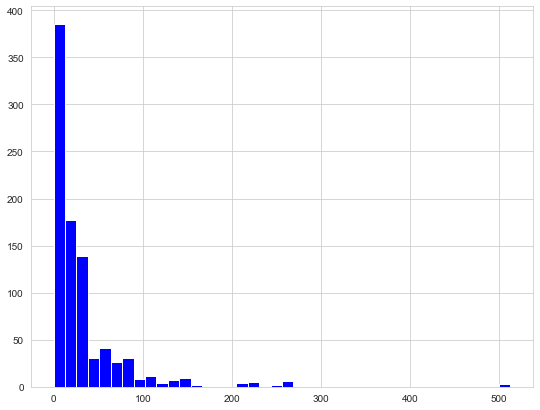

In [55]:
data['Fare'].hist(color='blue',bins=40,figsize=(9,7))

# Data Cleaning 

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

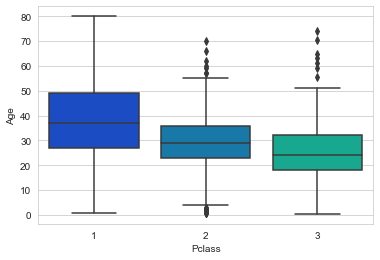

In [56]:
sb.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [57]:
def impute_age(coloms):
    Age=coloms[0]
    Pclass=coloms[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            


In [58]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

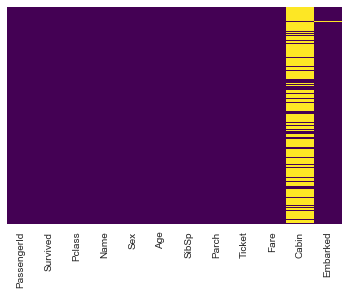

In [59]:
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
#droping column cabin
data.drop('Cabin',axis=1,inplace=True)

In [61]:
data.shape

(891, 11)

In [62]:
#droping null data
data.dropna( inplace=True)

In [63]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [64]:
data.drop('PassengerId',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)

In [65]:
data.shape

(889, 8)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [67]:
#encode sex and embarked columns
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data.iloc[:,2]=labelencoder.fit_transform(data.iloc[:,2].values)
data.iloc[:,7]=labelencoder.fit_transform(data.iloc[:,7].values)

In [68]:

print(data['Sex'].unique())
print(data['Embarked'].unique())

[1 0]
[2 0 1]


In [69]:
#split the data into feature and target

X=data.iloc[:,1:8].values
Y=data.iloc[:,0].values


In [70]:
#split the dataset into 80% train and 20% test

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=0)

In [71]:
#scale the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


# Logistic Regression 

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
pred = model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)

In [75]:
accuracy

0.7191011235955056

# KNN classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [77]:
pred = knn.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)

In [79]:
accuracy

0.7471910112359551

# svc(linear kernel)

In [80]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7191011235955056

# svc(rbf kernel)

In [82]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7415730337078652

# GaussianNB

In [84]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
pred = gauss.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.702247191011236

In [86]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7640449438202247

In [88]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
pred = forest.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(Y_test,pred)
accuracy

0.7134831460674157